## Overview
The figure below, shows a **single-phase sinusoidal voltage** supplying a load.

![](https://yaser-rahmati.gitbook.io/~/files/v0/b/gitbook-28427.appspot.com/o/assets%2F-M2g31CUvdCruJm660Ot%2F-MdVQbPu06Q324E8comr%2F-MdVR2SOg4j0oMuSZAbz%2F710.png?alt=media&token=cddd0915-b9b9-4f12-b2d2-57a8ed99137a)

Let the **instantaneous voltage** be:

$$v(t) = V_{m}cos(\omega t+\theta_{v})$$

and the **instantaneous current** be given by:

$$i(t) = I_{m}cos(\omega t+\theta_{i})$$

The **instantaneous power** p(t) delivered to the load is the product of voltage v(t) and current i(t) given by:

$$p(t)=v(t)i(t)=V_{m}I_{m}cos(\omega t+\theta_{v})cos(\omega t+\theta_{i})$$

Remember we have:

$$cos(A)cos(B)=\frac{1}{2}cos(A-B)+\frac{1}{2}cos(A+B)$$

which results in:

$$p(t)=\frac{1}{2}V_{m}I_{m}[cos(\theta_{v} - \theta_{i}) + cos(2\omega t + \theta_{v} + \theta_{i})]$$

By simplification, we have:

$$p(t)=\frac{1}{2}V_{m}I_{m}[cos(\theta_{v} - \theta_{i}) + cos2(\omega t + \theta_{v})cos(\theta_{v} - \theta_{i}) + sin2(\omega t + \theta_{v})sin(\theta_{v} - \theta_{i})]$$

The **root-mean-square** (rms) value of v(t) is:

$$|V| = \frac{V_{m}}{\sqrt{2}}$$

and the (rms) value of i(t) is:

$$|I| = \frac{I_{m}}{\sqrt{2}}$$

and let:

$$\theta = \theta _{v} - \theta _{i}$$

The above equation, in terms of the (rms) values, is reduced to:

$$p(t)=\underset{p_{R}(t)}{\underbrace{|V||I|cos(\theta)[1 + cos2(\omega t + \theta_{v})]}} + \underset{p_{X}(t)}{\underbrace{|V||I|sin(\theta)sin2(\omega t + \theta_{v})}}$$

where:
* θ is the angle between voltage and current or the impedance angle.
* θ is positive if the load is inductive.
* θ is negative if the load is capacitive.
* The first component of the above equation (energy flow into the circuit) is:

$$p_{R}(t) = |V||I|cos(\theta) + |V||I|cos(\theta)cos2(\omega t + \theta_{v})]$$

The **average power** delivered to the load is given by:

$$P = |V||I|cos(\theta) $$

The second component of the above equation (energy borrowed and returend by the circuit) is:

$$p_{R}(t) =|V||I|sin(\theta)sin2(\omega t + \theta_{v})$$

## Example

## 1. Import libraries

In [1]:
import numpy as np
from sympy import *
from sympy.plotting import plot

## 2. Data entry

In [2]:
Vm = 100        # Voltage Amplitude
thetav = 0      # Voltage Phase angle
Z = 1.25        # Impedance Magnitude
gama = 60       # Impedance Phase angle
thetai = thetav - gama                  # current phase angle in degree
theta = (thetav - thetai) * np.pi /180  # degree in radian
Im = Vm / Z     # current amplitude
fr = 60         # frequency
w = 2*np.pi*fr
t = Symbol('t')

## 3. Instantaneous Voltage & current

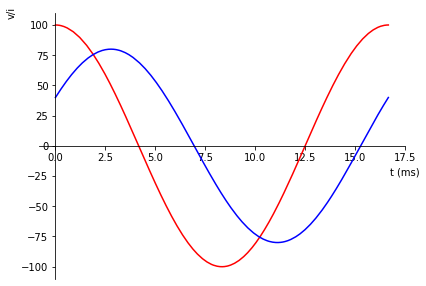

In [3]:
v = Vm * cos(w*t*0.001)
i = Im * cos(w*t*0.001 + (thetai*pi/180))
curv1 = plot(v, i,(t , 0 , 1000*2*np.pi/w) , xlabel='t (ms)', ylabel='v/i' , show=False)
curv1[0].line_color = 'red'     # voltage in red
curv1[1].line_color = 'blue'    # current in blue
curv1.show()

## 4. Power calculation

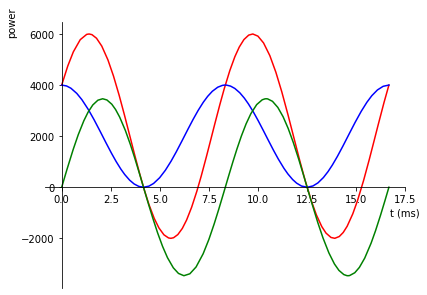

In [4]:
p = v * i                       # Instantaneous power
V = Vm / np.sqrt(2)             # rms voltage
I = Im / np.sqrt(2)             # rms current
P = V * I * cos(theta)          # Average power
Q = V * I * sin(theta)          # Reactive power
S = complex(P , Q)
pr = P * (1 + cos(2*(w*t*0.001 + thetav)))
px = Q * sin(2*(w*t*0.001 + thetav))
curv2 = plot(p, pr, px,(t , 0 , 1000*2*np.pi/w) , xlabel='t (ms)', ylabel='power' , show=False)
curv2[0].line_color = 'red'
curv2[1].line_color = 'blue'    
curv2[2].line_color = 'green' 
curv2.show()